# Demonstration of analog amplitude modulation principles

This demo is supposed to shed some light on the principles of [amplitude modulation (AM)](https://en.wikipedia.org/wiki/Amplitude_modulation) and demodulation. 

This demo is written by [Markus Nölle](https://www.htw-berlin.de/hochschule/personen/person/?eid=9586) for a basic course on communications engineering hold at the [university of applied siences, Berlin](https://www.htw-berlin.de/).

## Import libraries and set defaults

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import ipywidgets as widgets

fig_height = 5
plt.rcParams['figure.figsize'] = (fig_height*1.6, fig_height)
plt.rcParams['axes.grid'] = True

## General parameters

In [2]:
sr = 1e3
t = np.linspace(0, 1-1/sr, int(sr))
f = np.fft.fftshift(np.fft.fftfreq(np.size(t), 1/sr))

---

## Modulation

### Generation of the information signal

An examplary information signal is generated. Further, this signal and its corresponding [amplitude spectrum](https://en.wikipedia.org/wiki/Spectral_density#Explanation) is plotted.

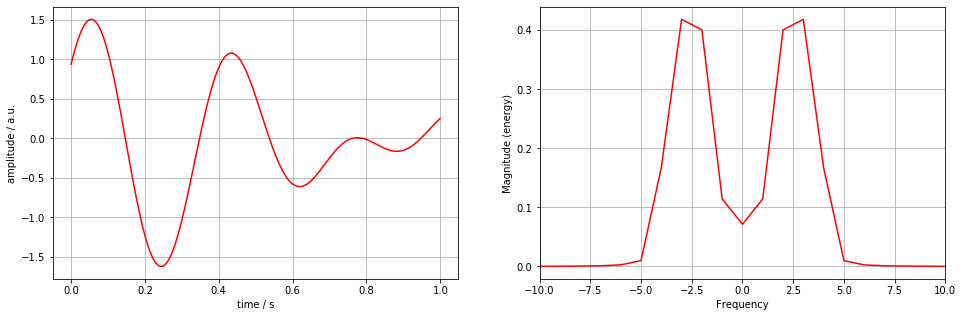

In [3]:
x = ((np.sin(4*np.pi*1.5*t) + np.sin(2*np.pi*2.1*t + 1.5))* np.exp(-t))
x = x - np.mean(x)

n_fig = 2
fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*fig_height*1.6, fig_height)))
ax[0].plot(t, x, 'r');
ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
ax[1].magnitude_spectrum(x, sides="twosided", Fs=sr, scale="linear", color='r'); # scale="dB" or "linear"
ax[1].set_xlim(-10, 10);

### Generation of the carrier signal

A [carrier signal](https://en.wikipedia.org/wiki/Carrier_wave) with the above specified carrier frequency is generated. Further, this signal and its corresponding [amplitude spectrum](https://en.wikipedia.org/wiki/Spectral_density#Explanation) is plotted.

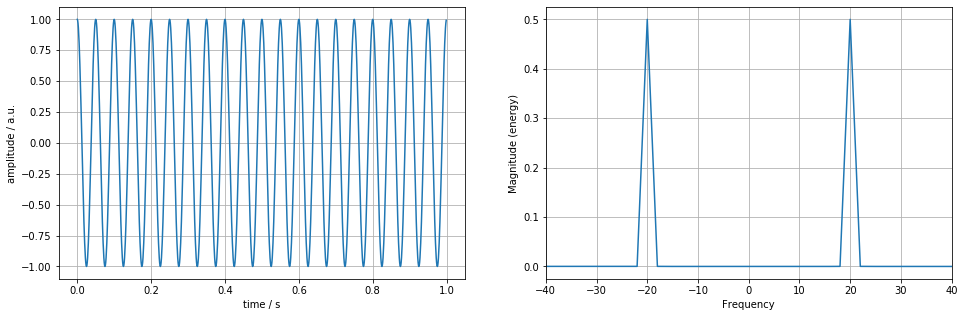

In [4]:
fc = 20

c = np.cos(2 * np.pi * fc * t)

n_fig = 2
fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*fig_height*1.6, fig_height)))
ax[0].plot(t, c);
ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
ax[1].magnitude_spectrum(c, sides="twosided", Fs=sr, scale="linear"); # scale="dB" or "linear"
ax[1].set_xlim(-2*fc, 2*fc);

### Actual amplitude modulation

The carrier and information signals are multiplied, resulting in an amplitude modulated signal (also known as [bandpass signal](https://en.wikipedia.org/wiki/Passband)). In this section also the [modulation index](https://en.wikipedia.org/wiki/Amplitude_modulation#Modulation_index) (m) can be varyied.

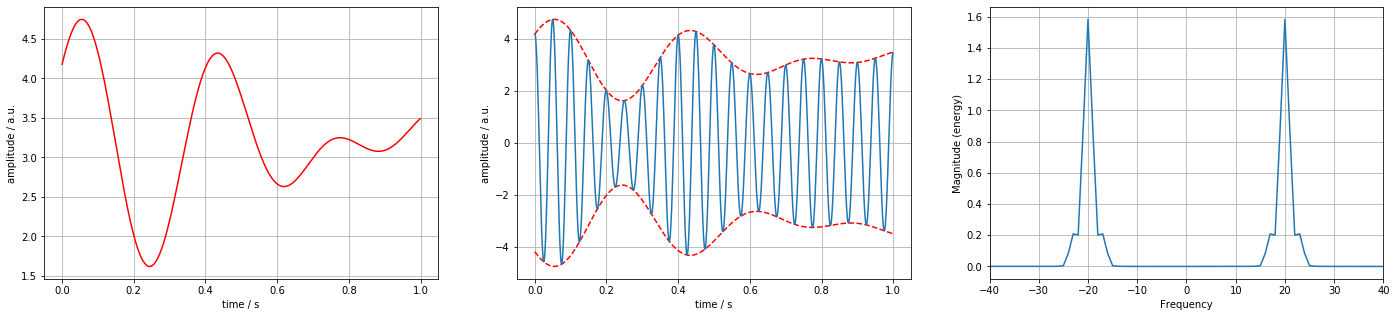

In [5]:
m = 0.5

maxx = np.max(np.abs(x))
a = maxx/m
x_am = a + x

x_am_bp = x_am * c

n_fig = 3
fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*fig_height*1.6, fig_height)))
ax[0].plot(t, x_am ,'r');
ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
ax[1].plot(t, x_am ,'--r', t, -x_am, '--r', t, x_am_bp);
ax[1].set(xlabel="time / s", ylabel="amplitude / a.u.")
ax[2].magnitude_spectrum(x_am_bp, sides="twosided", Fs=sr, scale="linear"); # scale="dB" or "linear"
ax[2].set_xlim(-2*fc, 2*fc);

---

## Demodulation

### Envolope detection

[envelope detection](https://en.wikipedia.org/wiki/Envelope_detector) ??? ![image of an envelope detector](https://upload.wikimedia.org/wikipedia/commons/6/6c/Simple_envelope_detector.svg) ???




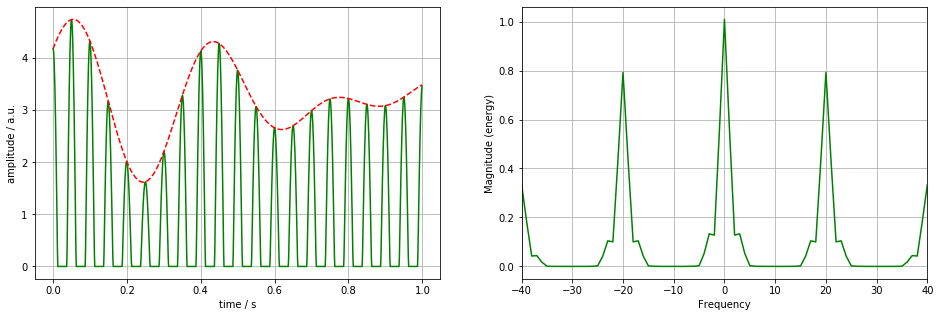

In [6]:
# evelope detection
x_dem = x_am_bp.copy()

# diode
x_dem[x_dem < 0] = 0

# # square
# x_dem = x_dem**2

n_fig = 2
fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*8, 8/1.6)))
ax[0].plot(t, x_dem ,'g', t, x_am, 'r--');
ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
ax[1].magnitude_spectrum(x_dem, sides="twosided", Fs=sr, scale="linear", color='g'); # scale="dB" or "linear"
ax[1].set_xlim(-40, 40);

### Synchronous detection

[synchronous detection](https://en.wikipedia.org/wiki/Synchronous_detector)

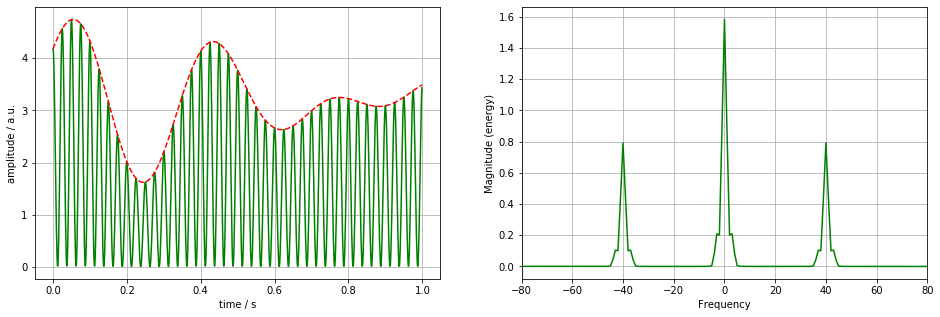

In [7]:
# synchron demodulation
df = 0*10
phi_lo = 0.*np.pi/2
lo = np.cos(2*np.pi*(fc+df)*t + phi_lo)
x_dem = x_am_bp * lo

n_fig = 2
fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*fig_height*1.6, fig_height)))
ax[0].plot(t, x_dem ,'g', t, x_am, 'r--');
ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
ax[1].magnitude_spectrum(x_dem, sides="twosided", Fs=sr, scale="linear", color='g'); # scale="dB" or "linear"
ax[1].set_xlim(-4*fc, 4*fc);

### Lowpass filtering

[Lowpass](https://en.wikipedia.org/wiki/Low-pass_filter) in this example a [Bessel filter](https://en.wikipedia.org/wiki/Bessel_filter)

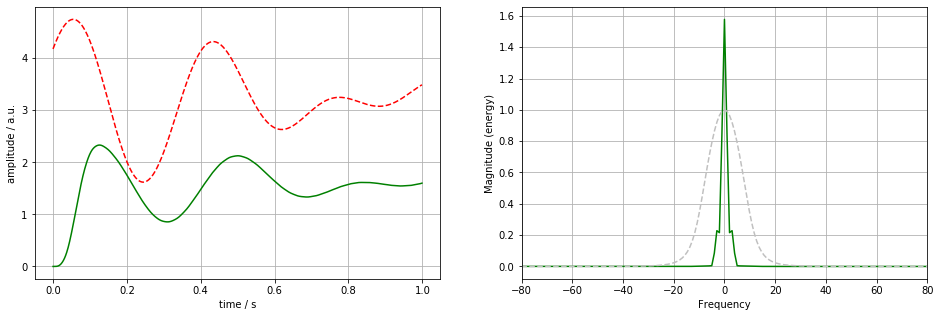

In [8]:
# generate filter coeffs of digital besselfilter
f_cut = 6
f_order = 5
b, a = signal.bessel(f_order, f_cut, btype='low', analog=False, output='ba', norm='mag', fs=sr)
w, h = signal.freqz(b, a)
w = np.concatenate((np.flip(-w), w))/ 2 / np.pi * sr
h = np.concatenate((np.flip(h), h))

# low pass filter (bessel in this case)
x_dem_filt = signal.lfilter(b, a, x_dem)

n_fig = 2
fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*fig_height*1.6, fig_height)))
ax[0].plot(t, x_dem_filt ,'g', t, x_am, 'r--');
ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
ax[1].magnitude_spectrum(x_dem_filt, sides="twosided", Fs=sr, scale="linear", color='g'); # scale="dB" or "linear"
ax[1].plot(w, np.abs(h), color='silver', ls='dashed')
ax[1].set_xlim(-4*fc, 4*fc);

---

## Ineractive Demo

summing up all above principles

In [9]:
def amplitude_mod(fc = 20, m = 0.5, demod_type="envelope", df=0, phi_lo=0, f_cut = 6, f_order=4):
    
    fig_height = 5
    
    sr = 1e3    
    t = np.linspace(0, 1-1/sr, int(sr))
    f = np.fft.fftshift(np.fft.fftfreq(np.size(t), 1/sr))
    
    x = ((np.sin(4*np.pi*1.5*t) + np.sin(2*np.pi*2.1*t + 1.5))* np.exp(-t))
    x = x - np.mean(x)
    
    c = np.cos(2 * np.pi * fc * t)
    
    maxx = np.max(np.abs(x))
    a = maxx/m
    x_am = a + x

    x_am_bp = x_am * c

    n_fig = 2    
    fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*fig_height*1.6, fig_height)))
    ax[0].plot(t, x_am ,'--r', t, -x_am, '--r', t, x_am_bp);
    ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
    ax[1].magnitude_spectrum(x_am_bp, sides="twosided", Fs=sr, scale="linear"); # scale="dB" or "linear"
    ax[1].set_xlim(-4*fc, 4*fc)
    
    if demod_type == "envelope":
        # evelope detection
        x_dem = x_am_bp
        # diode
        x_dem[x_dem < 0] = 0
    elif demod_type == "synchron":
        # synchron demodulation        
        lo = np.cos(2*np.pi*(fc+df)*t + phi_lo)
        x_dem = x_am_bp * lo        
    else:
        raise ValueError('demod_type must be either "envelope" or "synchron".')
    
    # generate filter coeffs of digital besselfilter    
    b, a = signal.bessel(f_order, f_cut, btype='low', analog=False, output='ba', norm='mag', fs=sr)
    w, h = signal.freqz(b, a)
    w = np.concatenate((np.flip(-w), w))/ 2 / np.pi * sr
    h = np.concatenate((np.flip(h), h))

    # low pass filter (bessel in this case)
    x_dem_filt = signal.lfilter(b, a, x_dem)

    n_fig = 2
    fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*fig_height*1.6, fig_height)))
    ax[0].plot(t, x_dem_filt ,'g', t, x_am, 'r--');
    ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
    ax[1].magnitude_spectrum(x_dem_filt, sides="twosided", Fs=sr, scale="linear", color='g'); # scale="dB" or "linear"
    ax[1].plot(w, np.abs(h), color='silver', ls='dashed')
    ax[1].set_xlim(-4*fc, 4*fc)

    
# generate sliders (widgets)
style = {'description_width': '40%'}
w_fc = widgets.IntSlider(min=0, max=400, step=1, value=20, continuous_update=False, description='Carrier freq.:', style=style)
w_m = widgets.FloatSlider(min=0, max=10, step=0.1, value=0.5, continuous_update=False, description='Mod. index:', style=style)
w_f_cut = widgets.IntSlider(min=1, max=400, step=1, value=6, continuous_update=False, description='LP filter cutoff freq.:', style=style)
w_f_order = widgets.IntSlider(min=1, max=10, step=1, value=4, continuous_update=False, description='LP filter order:', style=style)
w_demod_type = widgets.RadioButtons(options=['envelope', 'synchron'], value='envelope', description='Demodulation type:', style=style)
w_df = widgets.FloatSlider(min=0.0, max=20.0, step=0.1, value=0.0, continuous_update=False, description='LO offset freq.:', style=style)
w_phi_lo = widgets.FloatSlider(min=0, max=2*np.pi, step=0.1, value=0.0, continuous_update=False, description='LO phase:', style=style)

# group widgets
left_col = widgets.VBox([widgets.Label('General modulation parmeters'), w_fc, w_m])
mid_col = widgets.VBox([widgets.Label('General demodulation parmeters'), w_f_cut, w_f_order, w_demod_type ])
right_col = widgets.VBox([widgets.Label('Synchroneous demodulation parmeters'), w_df, w_phi_lo])
ui = widgets.HBox([left_col, mid_col, right_col])

# call function (generate output)
out = widgets.interactive_output(amplitude_mod, {'fc':w_fc, 'm':w_m, 'demod_type':w_demod_type, 'df':w_df, 'phi_lo':w_phi_lo, 'f_cut':w_f_cut, 'f_order':w_f_order})

# display all
display(ui, out)

Output()